In [87]:
import pandas as pd 
import numpy as np 
from math import *
import matplotlib.pyplot as plt
from IPython.display import Image
import os

df=pd.read_csv(r'D:/datascience_covid_professorRaja/COVID_AU_national_daily_change.csv')
df_cul=pd.read_csv(r'D:/datascience_covid_professorRaja/COVID_AU_national.csv')
#Preprocessing
df['date']=pd.to_datetime(df['date'])

N=25e6  #population of AUSSIE - Reviewed soon
sus=df['tests']
sus=sus[100:200]
new=df['confirmed']
new=new[:99] #In from here
cul=df['c_confirmed']
cul=cul[100:200] #I from here
T=len(cul)
recs=df['recovered']
recs=recs[100:200]
death=df_cul['deaths']
death=death[:99]
R = recs+death
#S=N-I
beta1=[]
beta2=[]
Ss=[]
for I in cul: 
    S=N-I
    Ss.append(S)


<img src="https://res.cloudinary.com/stephenblogdata-herokuapp-com/image/upload/v1610497401/capture-recapture_cfcaqr.png">

In [2]:
results=[]
for i in range(100,199):
    r = (new[i+1]*(new[i+1]-1))/(1+new[i]-death[i+1])
    results.append(r)

In [3]:
results[35]=0

In [83]:
cul

101     7040
102     7064
103     7086
104     7104
105     7118
       ...  
195    20273
196    20698
197    21084
198    21397
199    21714
Name: c_confirmed, Length: 99, dtype: int64

In [5]:
cul=cul[1:]
print(len(cul))

99


In [6]:
hidden=results+cul

In [7]:
hidden=hidden.astype('int')

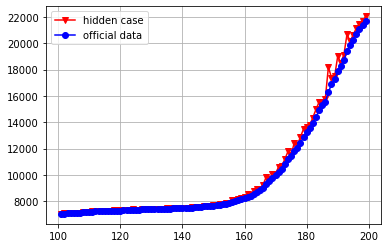

In [8]:
plt.plot(hidden,label='hidden case', marker='v',color='red')

plt.plot(cul, label='official data', marker='o', color='blue')
plt.legend()
plt.grid(1)
plt.show()

In [108]:
def capture_culmulative(new,death): 
    
    VarH=[]
    for i in range(len(new)-1):
        h = ((new[i+1]**4)/(1+new[i]-death[i+1])**3) + (4*(new[i+1])**3/((1+new[i]-death[i+1])**2)) + (new[i+1]**2)/(1+new[i]-death[i+1])
        VarH.append(h)
    return VarH
VarH=[]
for i in range(len(new)-1):
    h = ((new[i+1]**4)/(1+new[i]-death[i+1])**3) + (4*(new[i+1])**3/((1+new[i]-death[i+1])**2)) + (new[i+1]**2)/(1+new[i]-death[i+1])
    VarH.append(h)
VarH.insert(0,0)
hidden=np.array(hidden)

In [109]:
import math
def makevar(VarH):
    ci = []
    for i in VarH:
        c=1.96*sqrt(i)
        ci.append(c)
    return ci
ci=makevar(VarH)
len(VarH)

99

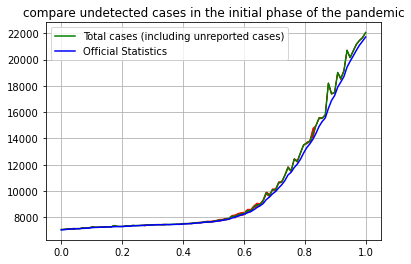

In [117]:
x=np.linspace(0,1,99)
fig, ax = plt.subplots()
ax.plot(x,hidden, color='green', label='Total cases (including unreported cases)')
ax.plot(x,cul[1:], color ='b', label='Official Statistics')
ax.grid(1)
plt.legend()
plt.title('compare undetected cases in the initial phase of the pandemic')
ax.fill_between(x,(hidden-ci), (hidden+ci), color='r', alpha=1, label='CI 95%')

In [113]:
len(cul)

100

# MY CAPTURE RECAPTURE

In [15]:
d=df['deaths']
d=d[100:200]

In [16]:
res=[]
for i in range(100,199):
    ra = (new[i]/new[i+1])*(new[i]-d[i+1])
    res.append(ra)

In [17]:
for i in range(0,99):
    if res[i]==inf or res[i]==np.nan:
        res[i]=0
res=np.nan_to_num(res)

In [18]:
mine=res+cul
mine=mine.astype('int')

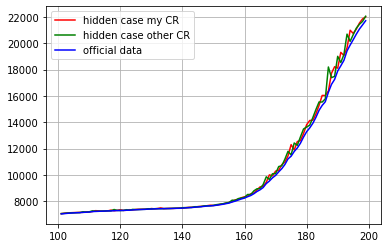

In [19]:
plt.plot(mine,label='hidden case my CR', color='red')
plt.plot(hidden,label='hidden case other CR',color='green')
plt.plot(cul, label='official data', color='blue')
plt.legend()
plt.grid(1)
plt.show()

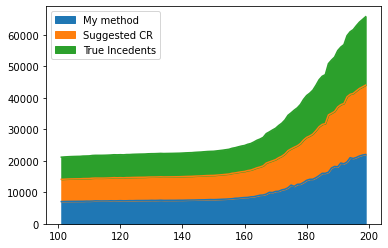

In [20]:
mydf=pd.DataFrame({'My method':mine, 'Suggested CR': hidden, 'True Incedents': cul})
mydf.plot.area(stacked=True)

In [21]:
mydf

,My method,Suggested CR,True Incedents
101,7060,7068,7040
102,7092,7084,7064
103,7112,7104,7086
104,7130,7117,7104
105,7141,7127,7118
...,...,...,...
195,20748,20656,20273
196,21081,21149,20698
197,21534,21446,21084
198,21850,21661,21397


In [22]:
df_o=pd.read_excel(r'datafile/owid-covid-data.xlsx')

In [23]:
z=df_o.loc[df_o['location']=='Australia']

In [24]:
z.iloc[:,:5].head(40)

,iso_code,continent,location,date,total_cases
2447,AUS,Oceania,Australia,2020-01-26,4.0
2448,AUS,Oceania,Australia,2020-01-27,5.0
2449,AUS,Oceania,Australia,2020-01-28,5.0
2450,AUS,Oceania,Australia,2020-01-29,6.0
2451,AUS,Oceania,Australia,2020-01-30,9.0
2452,AUS,Oceania,Australia,2020-01-31,9.0
2453,AUS,Oceania,Australia,2020-02-01,12.0
2454,AUS,Oceania,Australia,2020-02-02,12.0
2455,AUS,Oceania,Australia,2020-02-03,12.0
2456,AUS,Oceania,Australia,2020-02-04,13.0


In [25]:
df_ecdc=pd.read_csv(r'datafile/data.csv')

In [26]:
p = df_ecdc.loc[df_ecdc['countriesAndTerritories']=='Australia']

In [28]:
from numpy import random
recapture=[]
for i in cul:
    bi = random.binomial(n=len(cul), p=0.5, size=i)

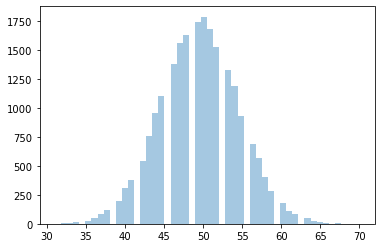

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(bi, hist=True, kde=False)

plt.show()

In [30]:
bi

array([52, 53, 44, ..., 53, 51, 51])

In [31]:
df4=pd.read_csv(r'C:/Users/Acer/Desktop/Readings/master_dataset.csv')

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,9,12,13,14,15,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
g=df4.loc[df4['region']=='AU']

In [33]:
g.loc[g['covid19_positive']==1]

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
2020-03-25,OC,AU,-31.9220,115.8140,50.0,male,20_30,170,62,21.4,...,0,0,0,0,NaN,NaN,NaN,73.0,0.050,NaN
2020-04-04,OC,AU,-37.9215,144.9816,20.0,female,50_60,168,50,17.7,...,0,0,0,0,NaN,15.0,5.0,73.0,0.104,NaN
2020-04-07,OC,AU,-37.7198,144.8552,20.0,male,20_30,172,102,34.4,...,0,1,0,0,ALPRAZOLAM;ESCITALOPRAM OXALATE,75.0,65.0,73.0,0.111,NaN
2020-04-07,OC,AU,-33.7877,151.1965,50.0,male,20_30,190,110,30.4,...,0,0,0,0,NaN,75.0,5.0,75.0,0.056,NaN
2020-03-28,OC,AU,-37.7591,145.0140,5.0,female,30_40,168,72,25.5,...,0,0,0,0,NaN,NaN,NaN,73.0,0.050,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,OC,AU,-33.5873,143.2000,1000.0,male,10_20,188,98,27.7,...,0,0,0,0,NaN,5.0,15.0,75.0,0.055,NaN
2020-11-07,OC,AU,-37.8553,145.0563,100.0,male,30_40,178,78,24.6,...,0,0,0,0,NaN,15.0,15.0,73.0,0.096,NaN
2020-04-04,OC,AU,-34.9995,138.5175,20.0,female,20_30,178,66,20.8,...,0,0,0,0,NaN,85.0,5.0,75.0,0.050,NaN
2020-04-09,OC,AU,-27.3925,153.0625,100.0,female,20_30,164,46,17.1,...,0,0,0,0,NaN,25.0,15.0,75.0,0.050,NaN


In [34]:
x = random.randint(600,1000, 40)
y = random.randint(0,200, 40)
culx=x
for i in range(len(x)-1): 
    x[i+1]=x[i]+x[i+1]
    
sim=pd.DataFrame(x,y)
sim.reset_index(inplace=True)
sim=sim.rename(columns={'index':'death',0:'infected'})

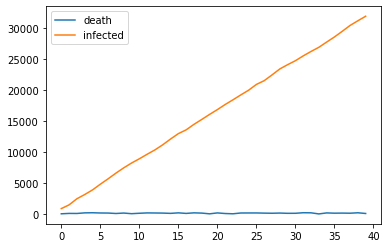

In [35]:
sim.plot()

In [36]:
x

array([  863,  1465,  2450,  3131,  3875,  4797,  5668,  6584,  7437,
        8213,  8898,  9630, 10334, 11159, 12088, 12959, 13569, 14456,
       15248, 16059, 16835, 17659, 18417, 19205, 19963, 20897, 21505,
       22430, 23397, 24084, 24725, 25503, 26218, 26887, 27730, 28557,
       29469, 30412, 31168, 31900])

In [37]:
o=capture_culmulative(culx,y)
o.append(x[0])
varm=makevar(o)

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


TypeError: unsupported operand type(s) for -: 'list' and 'list'

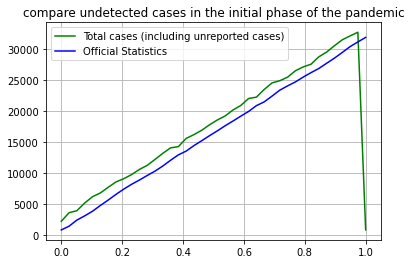

In [38]:
s=np.linspace(0,1,40)
fig, ax = plt.subplots()
ax.plot(s,o, color='green', label='Total cases (including unreported cases)')
ax.plot(s,x, color ='b', label='Official Statistics')
ax.grid(1)
plt.legend()
plt.title('compare undetected cases in the initial phase of the pandemic')
ax.fill_between(s,o-varm, o+varm,color='r', alpha=.5)

In [81]:
cul

101     7040
102     7064
103     7086
104     7104
105     7118
       ...  
195    20273
196    20698
197    21084
198    21397
199    21714
Name: c_confirmed, Length: 99, dtype: int64

In [40]:
o

[2251.91093051279,
 3643.187408197211,
 3958.586133510811,
 5200.430532674923,
 6216.0668634907315,
 6819.716068572,
 7721.523664026744,
 8593.149537847832,
 9118.254200339346,
 9776.673169210795,
 10605.682980026515,
 11260.13829145801,
 12215.334617389208,
 13202.083170368573,
 14088.947891879048,
 14291.909584872583,
 15614.877105622943,
 16226.830199554279,
 16933.769428150907,
 17813.345534765776,
 18590.734278380165,
 19234.325859362845,
 20195.172987706643,
 20924.59245723872,
 22045.233270757046,
 22270.80334195471,
 23509.150430814963,
 24561.06813936531,
 24916.301351092327,
 25493.571680748977,
 26523.025931037686,
 27144.417084240707,
 27577.11565806438,
 28770.701901256754,
 29537.01002351661,
 30553.010773210757,
 31510.29752033842,
 32137.574580774195,
 32731.080019811663,
 863]

In [41]:
o=np.array(o)
varm=np.array(varm)

In [76]:
import pysd
import pymc3 as pm
import pandas as pd
import theano
import theano.tensor as tt
def SIR_model(spread_rate, rec_rate, S_begin, I_begin, N):

    new_I_0 = tt.zeros_like(I_begin)
    def next_day(spread_rate, S_t, I_t, _):
        new_I_t = spread_rate/N*I_t*S_t
        S_t = S_t - new_I_t
        I_t = I_t + new_I_t - rec_rate * I_t
        return S_t, I_t, new_I_t
    outputs , _ = theano.scan(fn=next_day, sequences=[spread_rate],
    outputs_info=[S_begin, I_begin, new_I_0])
    S_all, I_all, new_I_all = outputs
    return S_all, I_all, new_I_all

gamma=-0.00126767 beta=0.0110497 R0=-8.71653
gamma=0.000717176 beta=0.0130346 R0=18.1749
gamma=0.000478117 beta=0.0127955 R0=26.7623
gamma=0.000812352 beta=0.0131297 R0=16.1626
gamma=0.0013859 beta=0.0137033 R0=9.88762
gamma=0.000826775 beta=0.0131442 R0=15.8981


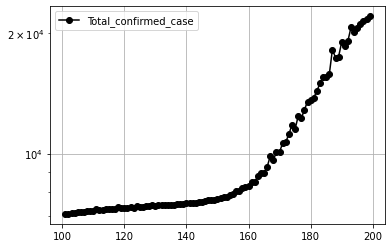

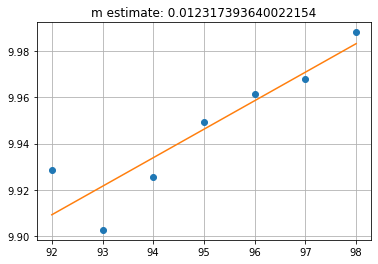

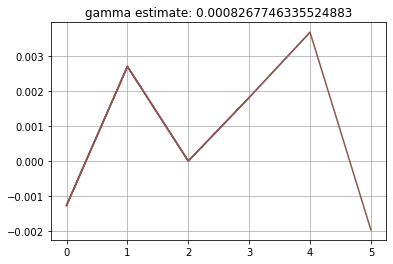

In [77]:
R=[x + y for x, y in zip(death, recs)]
I=[x - y for x, y in zip(hidden, R)]
plt.figure();
plt.plot(hidden, 'o-k');

plt.legend(['Total_confirmed_case', 'Death_cases', 'Recovered_cases'])
plt.grid(1);
plt.yscale('log')

plt.figure();
en=len(hidden); st=en-7;
y=np.log(I[st:en])
t=np.array(range(st, en))
m, b = np.polyfit(t, y, 1)
plt.plot(t, (y), 'o')
plt.plot(t, (m*t + b))
plt.title('m estimate: %s' % m)
plt.grid()
plt.figure()
g=[]
for i in range(st, en-1):
    oo=(R[i+1]-R[i])/I[i]
    g.append(oo)
    plt.plot(g)
    plt.grid(1)
    gamma= np.mean(g);
    plt.title('gamma estimate: %s' % gamma)
    gamma
    beta=m+gamma
    print('gamma=%g beta=%g R0=%g' %(gamma, beta, beta/gamma))

In [78]:
len(hidden)

99

In [79]:
with pm.Model():
    I_begin = pm.Lognormal("I_begin", mu=1, sigma=0.6)
    S_begin = 25e6 - I_begin
    S_all, I_all, new_I_all = SIR_model(beta,gamma, S_begin,I_begin,25e6)

IndexError: invalid index to scalar variable.

In [80]:
with pm.Model() as pm:
    x = pm.Lognormal('x', mu=2, sigma=30)

AttributeError: 'Model' object has no attribute 'Lognormal'

In [72]:
import pymc3

In [145]:
x = np.linspace(1,10000,10000)
y =np.random.poisson(low=0.005, high=4, size=(10000,))
plt.plot(x,y)
plt.figure()

TypeError: poisson() got an unexpected keyword argument 'low'

In [143]:
y

array([2.09274656, 2.68558063, 1.80705843, ..., 3.75041127, 3.69554417,
       1.59476385])

In [144]:
dir(random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'stand